# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# # a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

Metal device set to: Apple M1 Pro


2023-03-19 15:47:33.693619: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-19 15:47:33.693716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Compute cmb lensing

In [5]:
%%time 
M = Class()
# M.set(ksz_params)
# M.set(common_params)
M.set(cosmo_params)
M.set({
    'output': 'lCl',
    'l_max_scalars':10000.,

 'ell_max': 20000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0001,
    
'M_min':1e10,
'M_max':1e+17,
'z_min':1e-5,
'z_max': 15.,
    
# 'k_min_for_pk_class_sz' : 1e-4,
# 'k_max_for_pk_class_sz' : 5e1,
# 'k_per_decade_class_sz' : 20.,
# 'P_k_max_h/Mpc' : 200.0,

    
'ndim_masses' : 150, # important 128 is default ccl value
'ndim_redshifts' : 150,
'non_linear':'halofit',
'perturb_sampling_stepsize' : 0.005,
'k_max_tau0_over_l_max':5.,
    
'hm_consistency': 1,

})
M.compute()

CPU times: user 50 s, sys: 522 ms, total: 50.5 s
Wall time: 7.3 s


In [2]:
%%time 
M = Class()
# M.set(ksz_params)
# M.set(common_params)
M.set(cosmo_params)
M.set({
    'output': 'lens_lens_1h,lens_lens_2h,lens_lens_hf',
    # 'l_max_scalars':10000.,

 'ell_max': 20000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0001,
    
'M_min':1e10,
'M_max':1e+17,
'z_min':1e-5,
'z_max': 15.,
    
'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 200.0,

    
'ndim_masses' : 150, # important 128 is default ccl value
'ndim_redshifts' : 150,
'non_linear':'halofit',
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
    
'hm_consistency': 1,

})
M.compute()

CPU times: user 21.6 s, sys: 87.5 ms, total: 21.7 s
Wall time: 2.97 s


In [3]:
cl_kk = M.cl_kk

/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_96495/244391061.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


(2e-11, 1e-06)

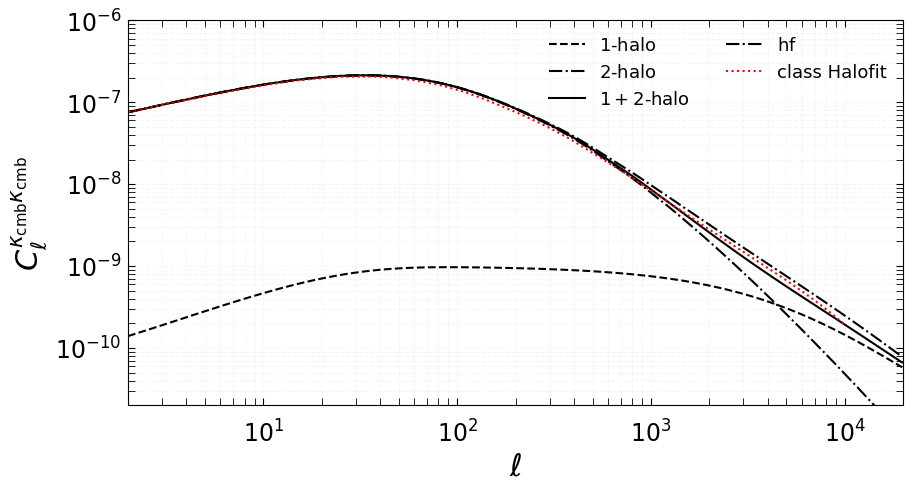

In [6]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk()['ell'])
fac = ell*(ell+1.)/2./np.pi
cl_kk_1h = np.asarray(cl_kk()['1h'])
cl_kk_2h = np.asarray(cl_kk()['2h'])
cl_kk_hf = np.asarray(cl_kk()['hf'])

# # ell = np.asarray(cl_gg()['ell'])
# cl_km_1h = np.asarray(cl_km()['1h'])
# cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,cl_kk_1h/fac,ls='--',c='k',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac,ls='-.',c='k',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac+cl_kk_1h/fac,ls='-',c='k',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_hf/fac,ls='-.',c='k',label=r'$\mathrm{hf}$')
# M.raw_cl()['ell']
# M.raw_cl()['pp']

class_cls, = ax.plot(M.raw_cl()['ell'],
                     M.raw_cl()['pp']*(M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2.)**2.,
                     ls=':',c='r',label=r'class Halofit')


plt.legend(frameon=True,framealpha=0,ncol=2,fontsize=13,loc=1)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(2e0,2.e4)
ax.set_ylim(2e-11,1.e-6)
# plt.savefig(path_to_kSZ2X_2022+'clkk_so_s4.pdf')